In [1]:
import pandas as pd
from plotnine import *
from sklearn.preprocessing import minmax_scale

In [2]:
harp_flare_data = pd.read_parquet("../combined_data/processed_high-qual_near-center-70_no-nas_flares.parquet")
print(harp_flare_data.shape)
harp_flare_data.head()

(3974765, 54)


,HARPNUM,T_REC,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,...,T_FRST1,T_LAST1,NOAA_AR,NOAA_NUM,NOAA_ARS,start time,peak time,end time,flare_class,peak_intensity
0,1,2010-05-01 14:00:00+00:00,5.827622e+21,23.887,73.347,77.564,31.354,-0.151826,4.860817e+12,0.000398,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN
1,1,2010-05-01 14:12:00+00:00,5.768150e+21,24.708,71.970,76.249,31.197,-0.226835,4.908301e+12,0.000081,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN
2,1,2010-05-01 14:24:00+00:00,5.865157e+21,25.657,74.254,82.154,32.748,-0.260023,5.577384e+12,-0.009573,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN
3,1,2010-05-01 14:36:00+00:00,5.854875e+21,25.242,74.539,81.896,33.026,-0.199640,5.290721e+12,-0.013852,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN
4,1,2010-05-01 14:48:00+00:00,5.854465e+21,25.876,75.671,85.297,33.556,-0.403703,5.911234e+12,-0.012455,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,<NA>,NaN


In [3]:
def calc_flare_stats(flare_data: pd.DataFrame) -> pd.Series:
    first_time = flare_data["T_REC"].iloc[0]
    last_time = flare_data["T_REC"].iloc[-1]
    harp_duration_in_hrs = (last_time - first_time).total_seconds() / 3600

    flare_data = flare_data.drop(columns="T_REC").drop_duplicates()
    flare_data = flare_data[flare_data["start time"].notna()]

    num_c_plus_flares = flare_data["flare_class"].isin(["C", "M", "X"]).sum()
    c_plus_flares_per_hr = num_c_plus_flares / harp_duration_in_hrs
    num_m_plus_flares = flare_data["flare_class"].isin(["M", "X"]).sum()
    m_plus_flares_per_hr = num_m_plus_flares / harp_duration_in_hrs
    num_x_flares = (flare_data["flare_class"] == "X").sum()
    x_flares_per_hr = num_x_flares / harp_duration_in_hrs
    flare_stats = pd.Series({
        "harp_duration_in_hrs": harp_duration_in_hrs,
        "num_c_plus_flares": num_c_plus_flares,
        "c_plus_flares_per_hr": c_plus_flares_per_hr,
        "num_m_plus_flares": num_m_plus_flares,
        "m_plus_flares_per_hr": m_plus_flares_per_hr,
        "num_x_flares": num_x_flares,
        "x_flares_per_hr": x_flares_per_hr
    })

    return flare_stats

In [4]:
harp_flare_stats = harp_flare_data.groupby("HARPNUM")[["T_REC", "start time", "flare_class"]].apply(calc_flare_stats)
harp_flare_stats.head()

/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_40248/954792151.py:10: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_40248/954792151.py:12: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_40248/954792151.py:14: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_40248/954792151.py:10: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_40248/954792151.py:12: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_40248/954792151.py:14: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_40248/954792151.py:10: RuntimeWarning: invalid value encountered in divide
/var/folders/0j/7bxrsnld6539ckmfpj6bgs4w0000gs/T/ipykernel_402

,harp_duration_in_hrs,num_c_plus_flares,c_plus_flares_per_hr,num_m_plus_flares,m_plus_flares_per_hr,num_x_flares,x_flares_per_hr
HARPNUM,,,,,,,
1,242.2,0.0,0.000000,0.0,0.000000,0.0,0.0
2,107.8,0.0,0.000000,0.0,0.000000,0.0,0.0
5,53.0,0.0,0.000000,0.0,0.000000,0.0,0.0
6,104.4,0.0,0.000000,0.0,0.000000,0.0,0.0
8,143.6,7.0,0.048747,2.0,0.013928,0.0,0.0


In [5]:
harp_flare_stats[harp_flare_stats.isna().any(axis=1)]

,harp_duration_in_hrs,num_c_plus_flares,c_plus_flares_per_hr,num_m_plus_flares,m_plus_flares_per_hr,num_x_flares,x_flares_per_hr
HARPNUM,,,,,,,
1486,0.0,0.0,NaN,0.0,NaN,0.0,NaN
3538,0.0,0.0,NaN,0.0,NaN,0.0,NaN
5968,0.0,0.0,NaN,0.0,NaN,0.0,NaN


In [6]:
harp_flare_data[harp_flare_data["HARPNUM"].isin([1486, 3538, 5968])]

,HARPNUM,T_REC,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,...,T_FRST1,T_LAST1,NOAA_AR,NOAA_NUM,NOAA_ARS,start time,peak time,end time,flare_class,peak_intensity
550011,1486,2012-03-19 17:48:00+00:00,5.856676e+17,24.164,58.895,44.051,54.024,10.744670,1.426940e+09,-0.306171,...,2012-03-19 10:24:00+00:00,2012-03-19 17:48:00+00:00,0,0,MISSING,NaT,NaT,NaT,<NA>,NaN
1291214,3538,2013-12-24 14:48:00+00:00,6.629736e+20,25.615,105.648,114.526,43.000,0.431428,1.119868e+12,-0.013963,...,2013-12-24 00:36:00+00:00,2013-12-26 00:12:00+00:00,0,0,MISSING,NaT,NaT,NaT,<NA>,NaN
2114594,5968,2015-09-17 02:36:00+00:00,4.010013e+20,27.494,82.910,90.048,35.254,1.217139,4.644680e+11,-0.032743,...,2015-09-17 02:36:00+00:00,2015-09-18 06:00:00+00:00,0,0,MISSING,NaT,NaT,NaT,<NA>,NaN


In [7]:
harp_flare_stats[["num_c_plus_flares", "num_m_plus_flares", "num_x_flares"]].apply(lambda x: x > 0).sum()

num_c_plus_flares    2861
num_m_plus_flares     587
num_x_flares           44
dtype: int64

In [8]:
# Groups from Figure 6 of https://doi.org/10.1029/2019SW002214
# TOTUSJH TOTUSJZ USFLUX TOTPOT
# ABSNJZH SAVNCPP
# NACR SIZE_ACR SIZE NPIX
# MEANPOT MEANJZH MEANSHR SHRGT45 MEANALP MEANJZD MEANGBT MEANGAM MEANGBZ MEANGBH
sharp_params = [
    "MEANGBH", "MEANGBZ", "MEANGAM", "MEANGBT", "MEANJZD", "MEANALP", "SHRGT45", "MEANSHR", "MEANJZH", "MEANPOT",
    "SAVNCPP", "ABSNJZH", 
    "TOTPOT", "USFLUX", "TOTUSJZ", "TOTUSJH"
]
areas_counts = ["NPIX", "SIZE", "SIZE_ACR", "NACR"]
all_predictors = sharp_params[:10] + areas_counts + sharp_params[10:]

In [9]:
harp_flare_data = harp_flare_data[["HARPNUM", "T_REC"] + all_predictors + ["peak time", "flare_class"]]

In [10]:
pd.DataFrame({"min": harp_flare_data[all_predictors].min(), "max": harp_flare_data[all_predictors].max()})

,min,max
MEANGBH,1.447000,1.686330e+02
MEANGBZ,4.641000,3.368490e+02
MEANGAM,8.057000,8.834100e+01
MEANGBT,6.383000,3.345140e+02
MEANJZD,-19.067125,2.525505e+01
MEANALP,-2.175931,1.978445e+00
SHRGT45,0.000000,1.000000e+02
MEANSHR,0.781000,8.971600e+01
MEANJZH,-0.145076,1.534227e-01
MEANPOT,0.739894,2.846815e+04


In [11]:
scaled_harp_flare_data = harp_flare_data.copy()
scaled_harp_flare_data[all_predictors] = minmax_scale(scaled_harp_flare_data[all_predictors])

In [12]:
def make_plot(df: pd.DataFrame, use_sharp_params_only: bool = False, scale_data: bool = False) -> ggplot:
    harp_num = df["HARPNUM"].iloc[0]
    title = f"HARP {harp_num}"

    first_time = df["T_REC"].iloc[0]
    first_time_tz_abbr = str(first_time.tzinfo)
    first_time_label = first_time.strftime(f'%Y-%m-%d\n%H:%M:%S {first_time_tz_abbr}')
    last_time = df["T_REC"].iloc[-1]
    last_time_tz_abbr = str(last_time.tzinfo)
    last_time_label = last_time.strftime(f'%Y-%m-%d\n%H:%M:%S {last_time_tz_abbr}')
    
    if use_sharp_params_only:
        predictor_cols = sharp_params
    else:
        predictor_cols = all_predictors
    harp_df = df[["T_REC"] + predictor_cols].copy()
    if scale_data:
        harp_df[predictor_cols] = minmax_scale(harp_df[predictor_cols])
        caption_middle = "For each predictor, scaling used values from this HARP only."
    else:
        caption_middle = "For each predictor, scaling used values from all HARPs."
    harp_df_long = pd.melt(harp_df, id_vars="T_REC", var_name="predictor", value_name="val")

    flare_classes = ["C", "M", "X"]
    flare_df = df.loc[df["peak time"].notna() & df["flare_class"].isin(flare_classes), ["peak time", "flare_class"]].drop_duplicates()
    flare_df["flare_class"] = pd.Categorical(flare_df["flare_class"], categories=flare_classes)
    if len(flare_df) > 0:
        caption_prefix = "Vertical lines are at flare peak times."
    else:
        caption_prefix = "There were no C-, M-, or X-class flares."
    caption_suffix = "Predictors are grouped and sorted according to Figure 6 of https://doi.org/10.1029/2019SW002214."
    caption = "\n".join([caption_prefix, caption_middle, caption_suffix])

    mapping = {predictor_col: i + 1 for i, predictor_col in enumerate(predictor_cols)}
    harp_df_long["predictor"] = harp_df_long["predictor"].map(mapping)
    y_breaks = list(range(1, len(predictor_cols) + 1))
    y_labels = predictor_cols
    if use_sharp_params_only:
        yintercepts = [10.5, 12.5]
    else:
        yintercepts = [10.5, 14.5, 16.5]

    plot = (
        ggplot(data=harp_df_long, mapping=aes(x="T_REC", y="predictor", fill="val")) +
        geom_tile() +
        geom_hline(yintercept=yintercepts, color="green", linetype="solid", size=1) +
        geom_vline(mapping=aes(xintercept="peak time", color="flare_class"), data=flare_df, linetype="dashed") +
        scale_x_datetime(breaks = [first_time, last_time], labels=[first_time_label, last_time_label]) +
        scale_y_continuous(breaks=y_breaks, labels=y_labels, minor_breaks=yintercepts) +
        scale_fill_gradient(low="white", high="black", limits=(0, 1)) +
        scale_color_manual(values=["blue", "orange", "red"]) +
        labs(x="Time", y="Predictor", color="Flare\nClass", fill="Min-Max-Scaled\nValue", title = title, caption=caption) +
        theme_classic() +
        theme(
            axis_title_y=element_text(margin={"r": -20}),
            axis_ticks_minor_y=element_line(color="green", size=1.7),
            axis_ticks_length_minor_y=50,
            legend_position="top"
        )
    )

    return plot

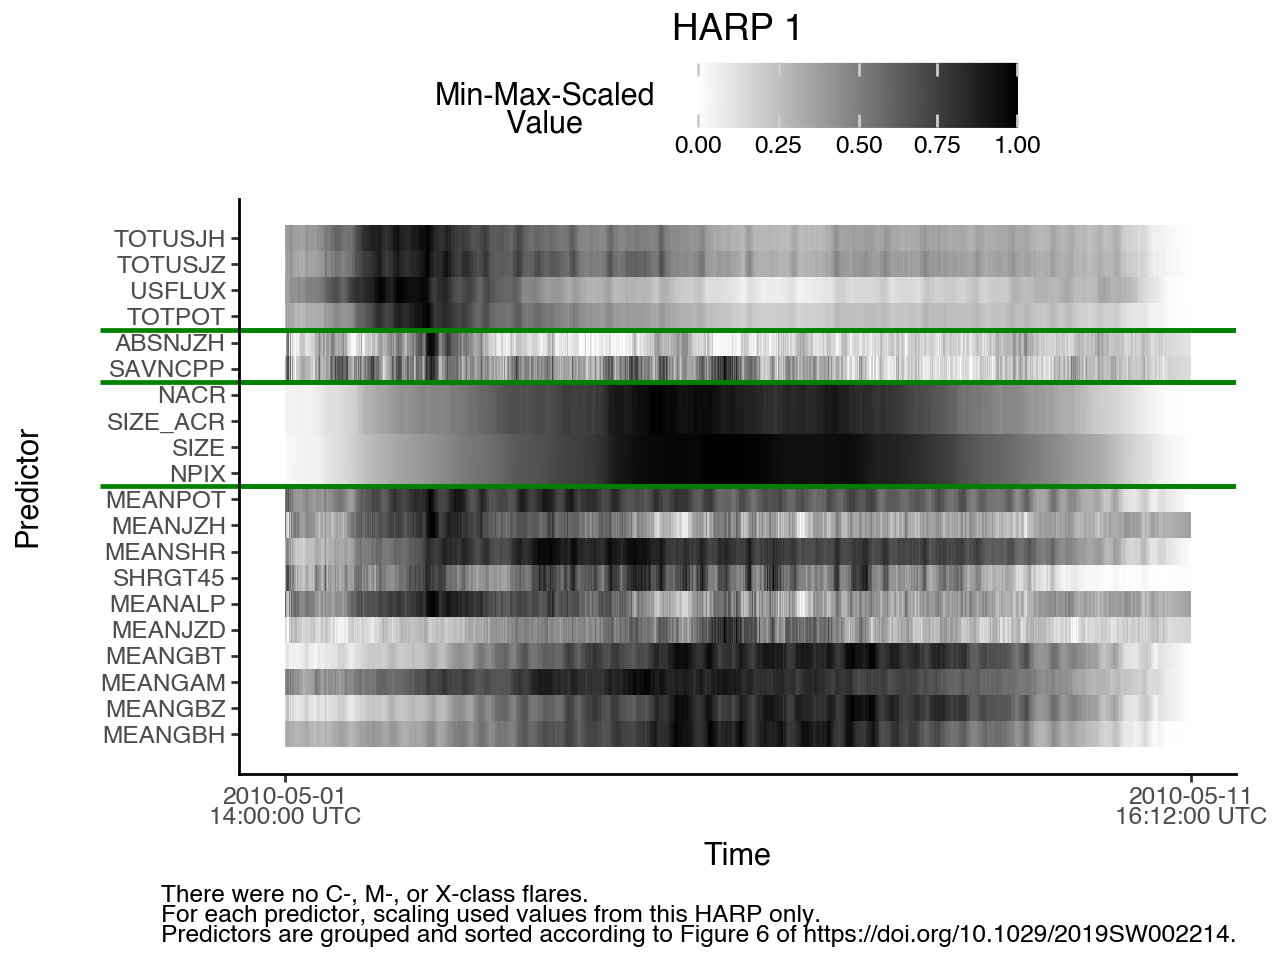

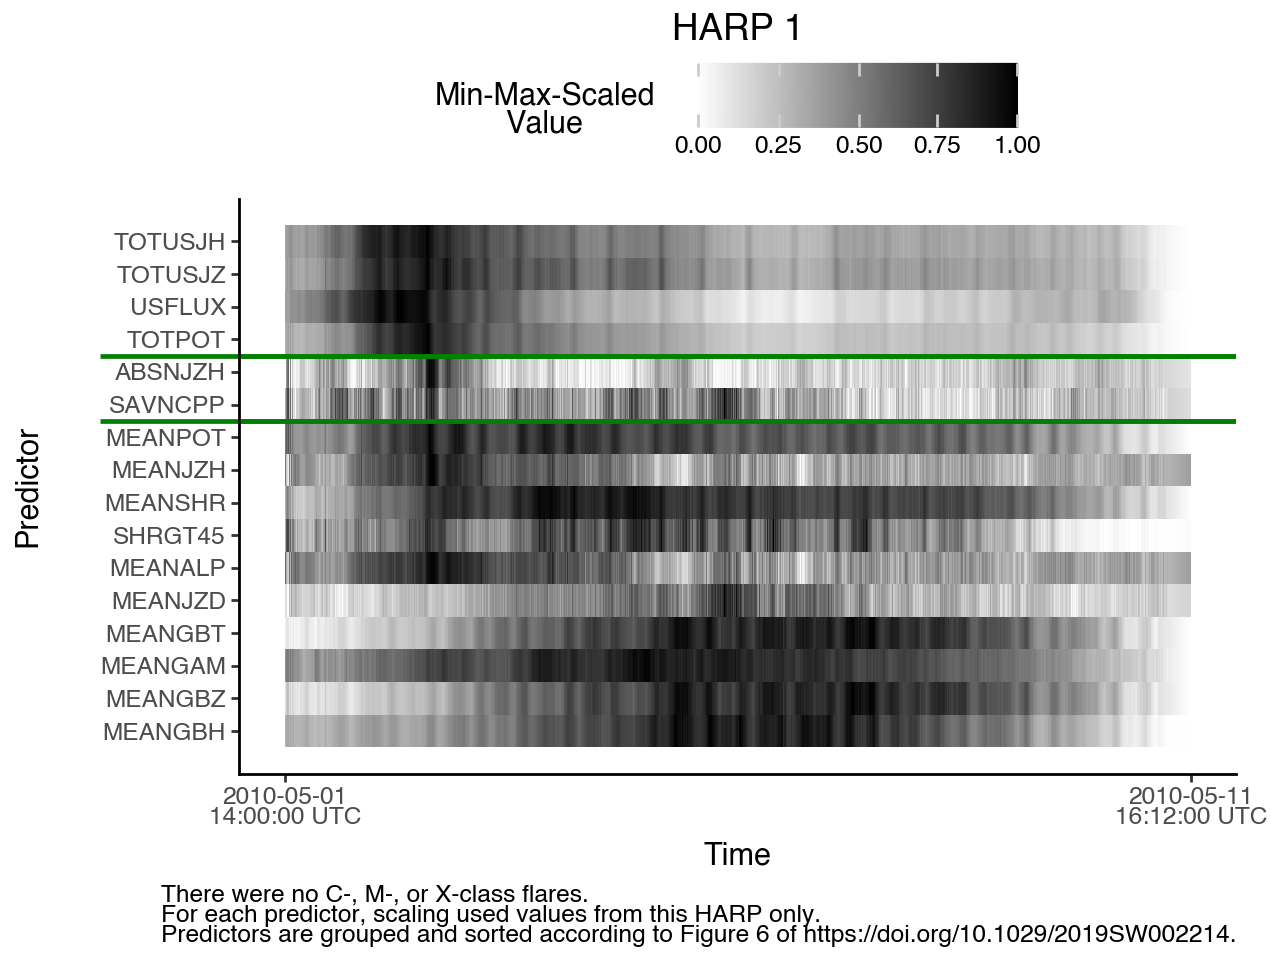

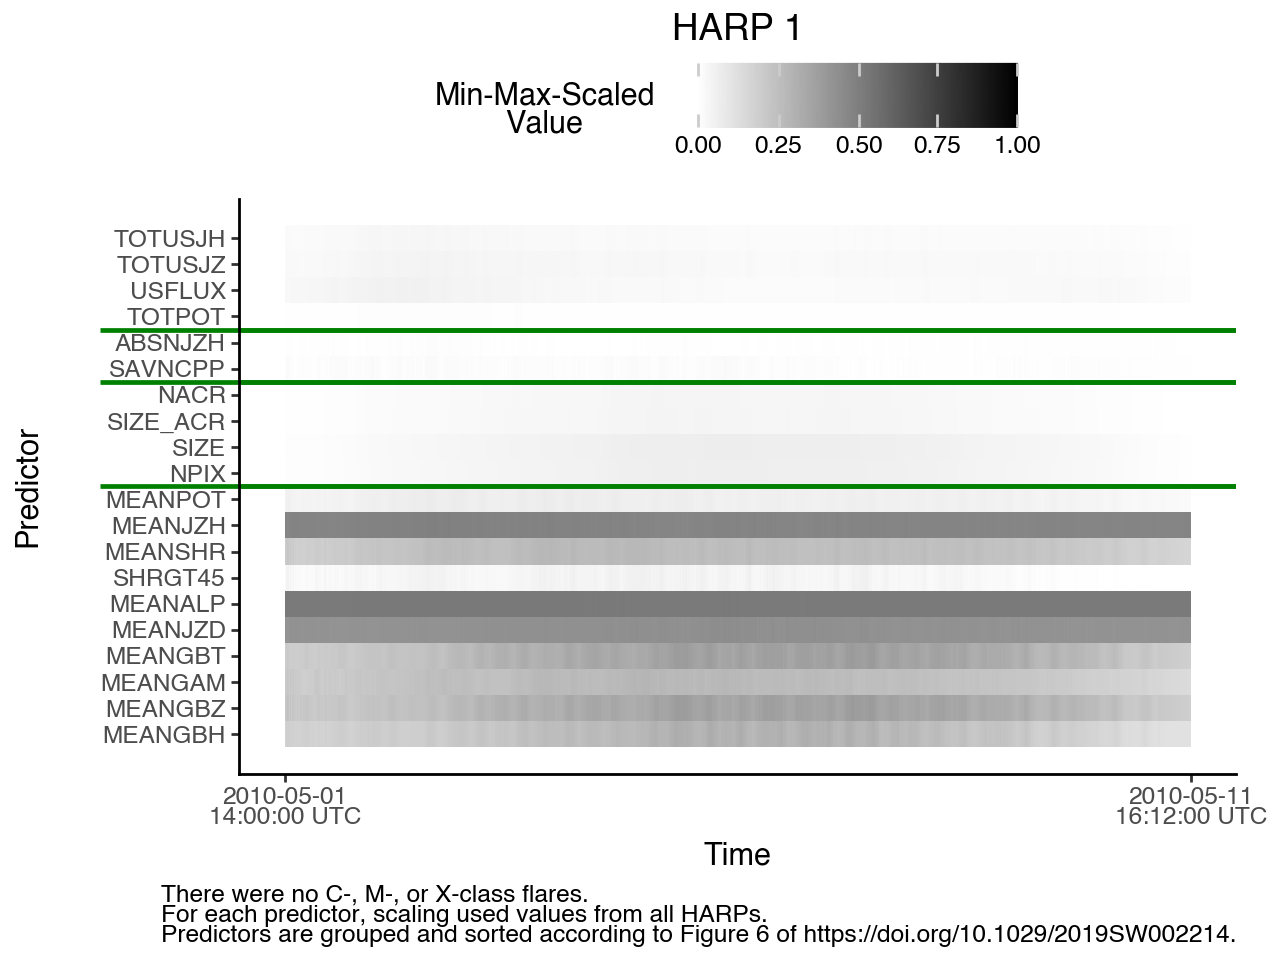

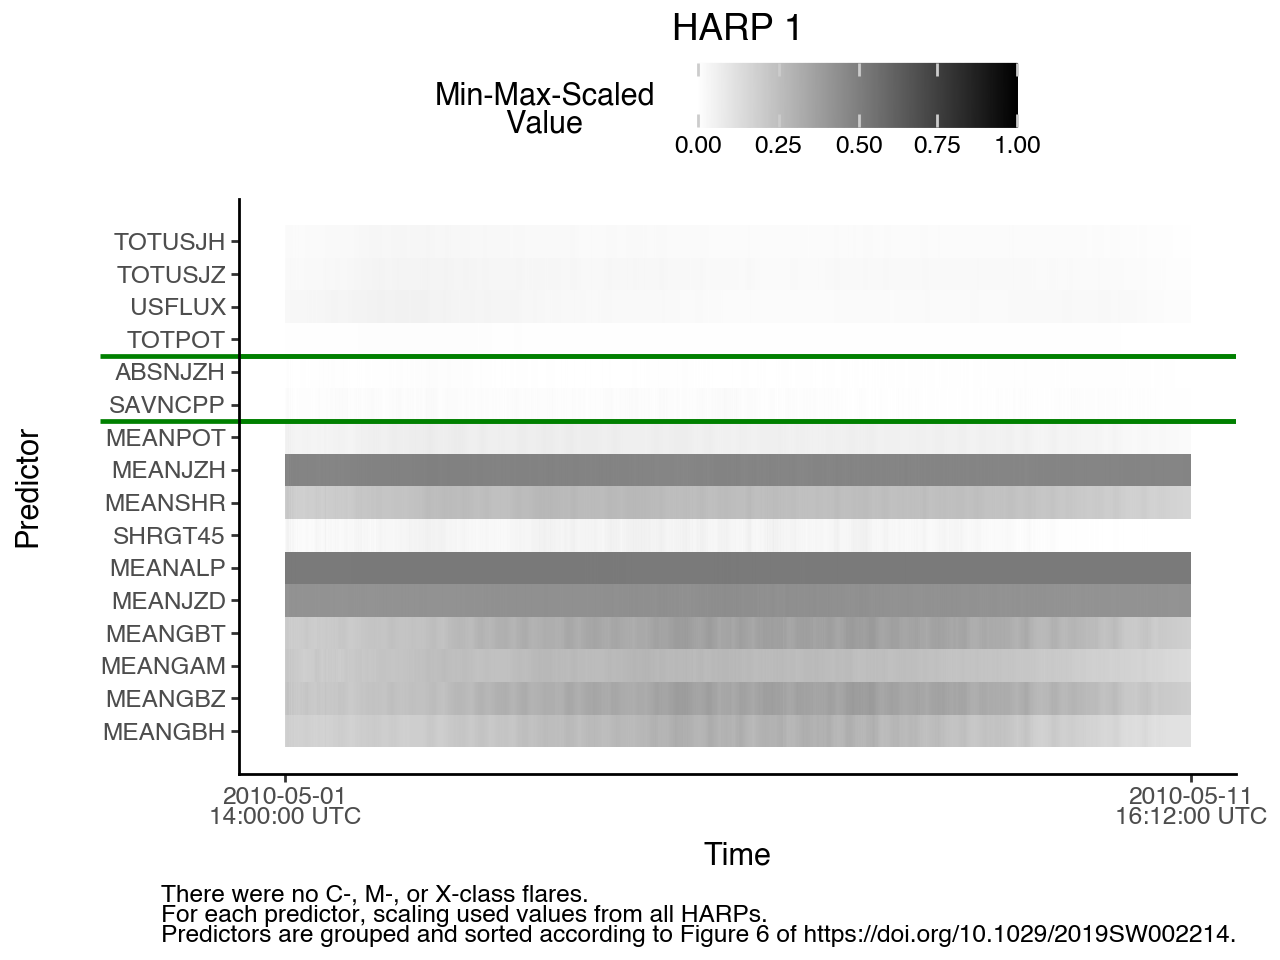

In [13]:
make_plot(harp_flare_data[harp_flare_data["HARPNUM"] == 1], scale_data=True).show()
make_plot(harp_flare_data[harp_flare_data["HARPNUM"] == 1], use_sharp_params_only=True, scale_data=True).show()
make_plot(scaled_harp_flare_data[scaled_harp_flare_data["HARPNUM"] == 1]).show()
make_plot(scaled_harp_flare_data[scaled_harp_flare_data["HARPNUM"] == 1], use_sharp_params_only=True)

In [14]:
scaled_harp_flare_data.loc[scaled_harp_flare_data["HARPNUM"] == 1, all_predictors].agg(["min", "max"])

,MEANGBH,MEANGBZ,MEANGAM,MEANGBT,MEANJZD,MEANALP,SHRGT45,MEANSHR,MEANJZH,MEANPOT,NPIX,SIZE,SIZE_ACR,NACR,SAVNCPP,ABSNJZH,TOTPOT,USFLUX,TOTUSJZ,TOTUSJH
min,0.117833,0.190718,0.14095,0.186962,0.420552,0.519028,0.00000,0.161961,0.469910,0.018475,0.004266,0.004453,0.001114,0.001081,0.000097,0.000024,0.000584,0.012025,0.007801,0.004975
max,0.328377,0.395270,0.29519,0.397357,0.452867,0.526932,0.06763,0.285332,0.499855,0.082959,0.066565,0.069354,0.043123,0.041963,0.026255,0.014030,0.009523,0.055604,0.049348,0.038408


In [16]:
harp_flare_stats_plots = harp_flare_stats

harp_flare_stats_plots["harp_by_harp_scaling_plot"] = (
    harp_flare_data.groupby("HARPNUM")[harp_flare_data.columns].apply(make_plot, scale_data=True)
)
harp_flare_stats_plots["all_harps_scaling_plot"] = (
    scaled_harp_flare_data.groupby("HARPNUM")[scaled_harp_flare_data.columns].apply(make_plot)
)

In [18]:
sort_cols = ["x_flares_per_hr", "m_plus_flares_per_hr", "c_plus_flares_per_hr", "harp_duration_in_hrs"]

In [ ]:
x_sort = harp_flare_stats_plots[harp_flare_stats_plots["num_x_flares"] > 0].sort_values(sort_cols, ascending=False)
save_as_pdf_pages(x_sort["harp_by_harp_scaling_plot"], filename="harp_by_harp_scaling/x_plots.pdf")
save_as_pdf_pages(x_sort["all_harps_scaling_plot"], filename="all_harps_scaling/x_plots.pdf")

/Users/vkverma/research/xray_flux_forecasting/env/lib/python3.9/site-packages/plotnine/ggplot.py:779: PlotnineWarning: Filename: harp_by_harp_scaling/x_plots.pdf
/Users/vkverma/research/xray_flux_forecasting/env/lib/python3.9/site-packages/plotnine/ggplot.py:779: PlotnineWarning: Filename: all_harps_scaling/x_plots.pdf


In [20]:
m_plus_sort = harp_flare_stats_plots[harp_flare_stats_plots["num_m_plus_flares"] > 0].sort_values(sort_cols, ascending=False)
save_as_pdf_pages(m_plus_sort["harp_by_harp_scaling_plot"], filename="harp_by_harp_scaling/m_plus_plots.pdf")
save_as_pdf_pages(m_plus_sort["all_harps_scaling_plot"], filename="all_harps_scaling/m_plus_plots.pdf")

/Users/vkverma/research/xray_flux_forecasting/env/lib/python3.9/site-packages/plotnine/ggplot.py:779: PlotnineWarning: Filename: harp_by_harp_scaling/m_plus_plots.pdf
/Users/vkverma/research/xray_flux_forecasting/env/lib/python3.9/site-packages/plotnine/ggplot.py:779: PlotnineWarning: Filename: all_harps_scaling/m_plus_plots.pdf
